# Overview 

### Instructions

1. Import you data and perform basic data exploration phase
   
        Display general information about the dataset
   
        Create a pandas profiling reports to gain insights into the dataset
   
        Handle Missing and corrupted values
   
        Remove duplicates, if they exist
   
        Handle outliers, if they exist
   
        Encode categorical features
   
2. Select your target variable and the features
3. Split your dataset to training and test sets
4. Build and train an SVM model on the training set
5. Assess your model performance on the test set using relevant evaluation metrics
6. Discuss with your cohort alternative ways to improve your model performance

# Import necessary libtraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.svm import SVR


# Load dataset 

In [2]:
# read csv file and convert file to dataframe
electric_df = pd.read_csv('Electric_cars_dataset.csv')
electric_df.head()

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
0,EV33174,5YJ3E1EC6L,Snohomish,LYNNWOOD,WA,98037.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,32.0,109821694,POINT (-122.287614 47.83874),PUGET SOUND ENERGY INC,50
1,EV40247,JN1AZ0CP8B,Skagit,BELLINGHAM,WA,98229.0,2011.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,40.0,137375528,POINT (-122.414936 48.709388),PUGET SOUND ENERGY INC,15
2,EV12248,WBY1Z2C56F,Pierce,TACOMA,WA,98422.0,2015.0,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,0,27.0,150627382,POINT (-122.396286 47.293138),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,18
3,EV55713,1G1RD6E44D,King,REDMOND,WA,98053.0,2013.0,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,45.0,258766301,POINT (-122.024951 47.670286),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),33.9
4,EV28799,1G1FY6S05K,Pierce,PUYALLUP,WA,98375.0,2019.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,25.0,296998138,POINT (-122.321062 47.103797),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,41.78


In [3]:
#electric_profile = ProfileReport(df, title="Electric Cars Profiling Report", explorative=True)
#electric_profile

In [4]:
# check shape of df
electric_df.shape

(64353, 18)

In [5]:
# check the information about dataset
electric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64353 entries, 0 to 64352
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 64353 non-null  object 
 1   VIN (1-10)                                         64353 non-null  object 
 2   County                                             64349 non-null  object 
 3   City                                               64344 non-null  object 
 4   State                                              64342 non-null  object 
 5   ZIP Code                                           64347 non-null  float64
 6   Model Year                                         64346 non-null  float64
 7   Make                                               64349 non-null  object 
 8   Model                                              64340 non-null  object 
 9   Electr

In [6]:
# check the columns
electric_df.columns

Index(['ID', 'VIN (1-10)', 'County', 'City', 'State', 'ZIP Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', 'Expected Price ($1k)'],
      dtype='object')

In [7]:
# check for missing values
electric_df.isnull().sum()

ID                                                     0
VIN (1-10)                                             0
County                                                 4
City                                                   9
State                                                 11
ZIP Code                                               6
Model Year                                             7
Make                                                   4
Model                                                 13
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 169
DOL Vehicle ID                                         0
Vehicle Location                                     510
Electric Utility                                     722
Expected Price ($1k)           

In [8]:
# make a copy of the df
df = electric_df.copy()

# Handle missing values in the columns 

In [9]:
#dropping unique identifier columns then deal with the nissing values in the rest of the columns
df.drop(columns=['ID', 'VIN (1-10)','DOL Vehicle ID', 'County', 'City','State', 'ZIP Code'], inplace=True) 

In [10]:
# renaming column names to lower cases and assing _ for better readability 
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()

In [11]:
# Replace 'N/' with NAN as a placeholder
df['expected_price_($1k)'] = df['expected_price_($1k)'].replace('N/', np.nan)

In [12]:
# replace NAN with 0
df['expected_price_($1k)'] = df['expected_price_($1k)'].fillna(0.0)

In [13]:
# Remove dollar signs and convert to float
df['expected_price_($1k)'] = df['expected_price_($1k)'].str.replace('[$,]', '', regex=True).astype(float)

In [14]:
# Handling missing values in model_year 
df['model_year'].head()

0    2020.0
1    2011.0
2    2015.0
3    2013.0
4    2019.0
Name: model_year, dtype: float64

In [15]:
df[df['model_year'].isnull()].head()

,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_(cafv)_eligibility,electric_range,base_msrp,legislative_district,vehicle_location,electric_utility,expected_price_($1k)
18618,NaN,HYUNDAI,SONATA PLUG-IN HYBRID,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,27,34600,4.0,POINT (-117.152872 47.645579),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,16.365
34663,NaN,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,46.0,POINT (-122.297534 47.685291),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),57.000
35578,NaN,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,17.0,POINT (-122.510748 45.603727),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,33.890
50803,NaN,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,12.0,POINT (-120.336499 47.425146),PUD NO 1 OF CHELAN COUNTY,72.000
54860,NaN,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,21.0,POINT (-122.333046 47.829439),PUGET SOUND ENERGY INC,18.860


In [16]:
# find the model years for the three cars
hyundai_model_years = df[df['make'] == 'HYUNDAI'][['make', 'model', 'model_year']]
print(hyundai_model_years.head())

# Check model year for Tesla
tesla_model_years = df[df['make'] == 'TESLA'][['make', 'model', 'model_year']]
print(tesla_model_years.head())

# Check model year for Audi
audi_model_years = df[df['make'] == 'AUDI'][['make', 'model', 'model_year']]
print(audi_model_years.head())


        make                  model  model_year
5    HYUNDAI  SONATA PLUG-IN HYBRID      2016.0
72   HYUNDAI  SONATA PLUG-IN HYBRID      2016.0
94   HYUNDAI  SONATA PLUG-IN HYBRID      2016.0
234  HYUNDAI          KONA ELECTRIC      2021.0
502  HYUNDAI               SANTA FE      2022.0
     make    model  model_year
0   TESLA  MODEL 3      2020.0
7   TESLA  MODEL S      2016.0
15  TESLA  MODEL Y      2021.0
17  TESLA  MODEL Y      2020.0
21  TESLA  MODEL 3      2021.0
     make   model  model_year
18   AUDI    Q5 E      2021.0
54   AUDI      Q5      2022.0
64   AUDI    Q5 E      2021.0
112  AUDI  E-TRON      2022.0
117  AUDI    Q5 E      2021.0


In [17]:
# fill the missing  values with the specific model year
tesla_replace = 2020.0
df.loc[(df['make'] == 'TESLA') & (df['model_year'].isnull()), 'model_year'] = tesla_replace

hyundai_replace = 2016.0
df.loc[(df['make'] == 'HYUNDAI') & (df['model_year'].isnull()), 'model_year'] = hyundai_replace

audi_replace = 2022.0
df.loc[(df['make'] == 'AUDI') & (df['model_year'].isnull()), 'model_year'] = audi_replace

In [18]:
# replace remainder with 2014.0
model_year_replace = 2014.0
df['model_year'] = df.model_year.fillna(model_year_replace)


In [19]:
# check Country column
df['electric_utility'].head()

0                               PUGET SOUND ENERGY INC
1                               PUGET SOUND ENERGY INC
2    BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
3        PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
4    BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
Name: electric_utility, dtype: object

In [20]:
# fill missing values in Electric Utility by a place holder 'NOT SPECIFIED'
df['electric_utility']= df['electric_utility'].fillna('NOT SPECIFIED')

In [21]:
# checking the missing values in the make column
df[df['make'].isnull()]

,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_(cafv)_eligibility,electric_range,base_msrp,legislative_district,vehicle_location,electric_utility,expected_price_($1k)
23333,2012.0,NaN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,35.0,POINT (-122.874042 46.998873),PUGET SOUND ENERGY INC,17.00
27605,2021.0,NaN,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,41.0,POINT (-122.132064 47.494834),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),64.00
55367,2021.0,NaN,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,40.0,POINT (-122.414936 48.709388),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,24.69
59308,2022.0,NaN,SORENTO,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,0,18.0,POINT (-122.261993 45.622947),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,29.49


In [22]:
# checking unique make of the cars
df.make.unique()

array(['TESLA', 'NISSAN', 'BMW', 'CHEVROLET', 'HYUNDAI', 'VOLKSWAGEN',
       'MINI', 'LAND ROVER', 'AUDI', 'KIA', 'TOYOTA', 'JEEP', 'CHRYSLER',
       'JAGUAR', 'FORD', 'HONDA', 'POLESTAR', 'SUBARU', 'VOLVO', 'FIAT',
       'SMART', 'PORSCHE', 'MITSUBISHI', 'MERCEDES-BENZ', 'LINCOLN',
       'TH!NK', 'CADILLAC', 'DODGE', 'RIVIAN', 'FISKER', 'AZURE DYNAMICS',
       'LUCID MOTORS', nan, 'WHEEGO ELECTRIC CARS', 'BENTLEY'],
      dtype=object)

In [23]:
# fill the missing values of make with information found
df.loc[23333, 'make'] = 'NISSAN'

df.loc[27605, 'make'] = 'TESLA'

df.loc[55367, 'make'] = 'KIA'

df.loc[59308, 'make'] = 'KIA'

In [24]:
# Checking missing values in the model column

missing_model = df[df['model'].isnull()]

missing_model

,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_(cafv)_eligibility,electric_range,base_msrp,legislative_district,vehicle_location,electric_utility,expected_price_($1k)
2714,2022.0,FORD,NaN,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,48.0,POINT (-122.203169 47.619011),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),NaN
4081,2022.0,FORD,NaN,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,10.0,POINT (-122.63841 48.310313),PUGET SOUND ENERGY INC,NaN
13866,2022.0,FORD,NaN,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,24.0,POINT (-122.69441 47.905058),BONNEVILLE POWER ADMINISTRATION||PUGET SOUND E...,NaN
14787,2022.0,FORD,NaN,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,18.0,POINT (-122.408498 45.620943),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,NaN
16164,2022.0,FORD,NaN,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,41.0,POINT (-122.151342 47.560192),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),NaN
22827,2022.0,FORD,NaN,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,36.0,POINT (-122.343577 47.672491),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),NaN
26799,2022.0,FORD,NaN,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,26.0,POINT (-122.599454 47.36582),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,NaN
28511,2022.0,FORD,NaN,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,18.0,POINT (-122.408498 45.620943),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,NaN
31081,2022.0,FORD,NaN,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,29.0,POINT (-122.447791 47.1543),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,NaN
37957,2022.0,FORD,NaN,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,49.0,POINT (-122.576308 45.677838),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,NaN


In [25]:
# Filter rows where the 'make' column is 'FORD'
ford_rows = df[(df['make'] == 'FORD') & (df['model_year'] == 2022.0)]

# Display the model
ford_rows


,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_(cafv)_eligibility,electric_range,base_msrp,legislative_district,vehicle_location,electric_utility,expected_price_($1k)
2714,2022.0,FORD,NaN,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,48.0,POINT (-122.203169 47.619011),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),NaN
4081,2022.0,FORD,NaN,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,10.0,POINT (-122.63841 48.310313),PUGET SOUND ENERGY INC,NaN
13866,2022.0,FORD,NaN,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,24.0,POINT (-122.69441 47.905058),BONNEVILLE POWER ADMINISTRATION||PUGET SOUND E...,NaN
14787,2022.0,FORD,NaN,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,18.0,POINT (-122.408498 45.620943),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,NaN
16164,2022.0,FORD,NaN,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,41.0,POINT (-122.151342 47.560192),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),NaN
22827,2022.0,FORD,NaN,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,36.0,POINT (-122.343577 47.672491),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),NaN
26799,2022.0,FORD,NaN,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,26.0,POINT (-122.599454 47.36582),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,NaN
28511,2022.0,FORD,NaN,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,18.0,POINT (-122.408498 45.620943),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,NaN
31081,2022.0,FORD,NaN,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,29.0,POINT (-122.447791 47.1543),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,NaN
37957,2022.0,FORD,NaN,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,49.0,POINT (-122.576308 45.677838),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,NaN


In [26]:
# fill missing values of model with 'ESCAPE'
df['model'] = df['model'].fillna('ESCAPE')

In [27]:
# check the missing values on columns
df.isnull().sum()

model_year                                             0
make                                                   0
model                                                  0
electric_vehicle_type                                  0
clean_alternative_fuel_vehicle_(cafv)_eligibility      0
electric_range                                         0
base_msrp                                              0
legislative_district                                 169
vehicle_location                                     510
electric_utility                                       0
expected_price_($1k)                                  13
dtype: int64

In [28]:
df['expected_price_($1k)'] = df['expected_price_($1k)'].fillna(0.0)

In [29]:
# drop the last two columns with missing values as I will not need it
df.drop(columns=['legislative_district', 'vehicle_location'], inplace=True) 

In [30]:
# check for duplicates
duplicates = df[df.duplicated()]
duplicates

,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_(cafv)_eligibility,electric_range,base_msrp,electric_utility,expected_price_($1k)
40,2021.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),64.000
43,2021.0,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),73.000
47,2014.0,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,72,0,PUGET SOUND ENERGY INC,16.000
50,2021.0,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),73.000
66,2021.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),64.000
...,...,...,...,...,...,...,...,...,...
64348,2020.0,KIA,NIRO,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239,0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),33.000
64349,2013.0,TOYOTA,PRIUS PLUG-IN,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,6,0,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,13.300
64350,2018.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),22.857
64351,2017.0,PORSCHE,CAYENNE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),45.700


Not going to drop the duplicates as it says that there are 59,561 duplicates yet our dataframe has 64353 rows 


## Check for outliers and handle it 

In [34]:
df.head()

,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_(cafv)_eligibility,electric_range,base_msrp,electric_utility,expected_price_($1k)
0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,PUGET SOUND ENERGY INC,50.00
1,2011.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,PUGET SOUND ENERGY INC,15.00
2,2015.0,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,0,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,18.00
3,2013.0,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),33.90
4,2019.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,41.78


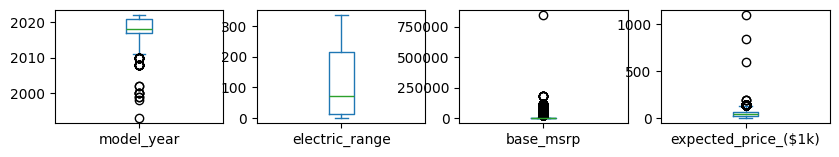

In [31]:
# box plot to visualize outliers
df.plot(kind='box', subplots=True,figsize=(10,5),layout=(3,4))
plt.show()

# Feature and target selection

In [38]:
df.head()

,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_(cafv)_eligibility,electric_range,base_msrp,electric_utility,expected_price_($1k)
0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,PUGET SOUND ENERGY INC,50.00
1,2011.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,PUGET SOUND ENERGY INC,15.00
2,2015.0,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,0,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,18.00
3,2013.0,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),33.90
4,2019.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,41.78


## Encoding categorical values 

In [39]:
# instantiate labelencoder object
le = LabelEncoder()

categorical_cols = ['make', 'model', 'electric_vehicle_type', 'clean_alternative_fuel_vehicle_(cafv)_eligibility','electric_utility']

# apply le on categorical feature columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))

In [40]:
# defining the features and target variable

X = df.drop(['expected_price_($1k)'], axis=1)

y = df['expected_price_($1k)']

# Split dataset to training and test sets

In [41]:
# split X and y into training and testing sets


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [42]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((51482, 8), (12871, 8))

# Build  and train an SVM model on the training set

## Standardization

In [43]:

# initilize standarization scaler
scaler = StandardScaler()

# pass tranining set and test set 
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

## Training using the radial basis function kernel

In [44]:
model = SVR(kernel='rbf')  
model.fit(X_train, y_train)

SVR()

# Make predictions

In [45]:

predictions = model.predict(X_test)


# Evaluate model

In [46]:
# Evaluate model using mean squared errir and r-squares
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'MSE: {mse}, R2: {r2}')

MSE: 120.40679203790796, R2: 0.7933608991771504


In [47]:
mse = 120.40679203790796
rmse = np.sqrt(mse)

print(f"RMSE: {rmse}")

RMSE: 10.973002872409538


# Interpretation

An RMSE of 10.97 is relatively reasonable, indicating that while there are errors in predictions, they are not excessively large.

Though there are rooms of improvement